In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/10295/1/10295_idx5_x1451_y1751_class1.png  2.4984  2.3112  2.5208   
data/10295/1/10295_idx5_x1251_y1751_class1.png  2.3984  2.4340  2.4816   
data/10295/1/10295_idx5_x1501_y1351_class1.png  2.3928  2.5132  2.6456   
data/10295/1/10295_idx5_x1501_y1601_class1.png  2.7404  2.5352  2.3744   
data/10295/1/10295_idx5_x1251_y1851_class1.png  2.3600  2.9432  2.1736   

                                                    gray  edges  group  
data/129

## Splitting in train and test set.

In [17]:
X= df[['red','green','blue','gray','edges']]
y=df['group']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.125, shuffle=False)

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   

                                                    gray  edges  
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730     83  
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340    350  
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321     14  
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825      0  
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241    187  
(22448, 5)

X_test : 
                                                   red   green    blue  \
data/12909/0/12909_idx5_x2401_y1151_class0.png  2.51

## Single decision tree classifier

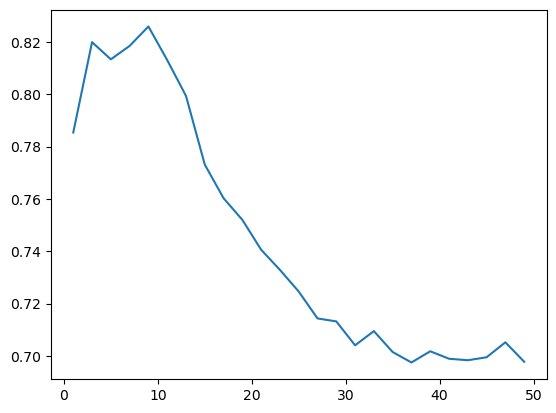

In [25]:
#Single decision tree with different depths, to see what is proper.
acc_for_depths = []
step_size = 2
for i in range(1,50,step_size):
    model = DecisionTreeClassifier(max_depth = i)
    model = model.fit(X_train, y_train)

    predicted_value = model.predict(X_val)
    #print(predicted_value)

    #To plot the actual decision tree
    #tree.plot_tree(model)

    zeroes = 0
    ones = 0

    for i in y_train:
        if i == 0:
            zeroes += 1
        else:
            ones += 1

    val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
    #print("Gini :", val)

    match = 0
    UnMatch = 0

    for i in range(len(predicted_value)):
        if predicted_value[i] == y_val[i]:
            match += 1
        else:
            UnMatch += 1

    accuracy = match/len(predicted_value)
    acc_for_depths.append(accuracy)
    #print("Accuracy is: ", accuracy)
    
plt.plot(range(1,50,step_size), acc_for_depths)
plt.show()
#Observing in the plot that max_depth = 10 gives the highest accuracy when validating.

#ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_value)).plot()

0.8204104903078677
0.8241163055872291
0.8187001140250855
0.8246864310148233
0.8244013683010262
0.8258266818700114
0.8263968072976055
0.8167046750285063
0.8181299885974914
0.8158494868871151
0.8129988597491448
0.81442417331813
0.8081527936145952
0.8087229190421893
0.8087229190421893
0.8090079817559863
0.8124287343215507
0.8095781071835804
0.8081527936145952
0.8078677309007982
0.8110034207525656
0.806442417331813
0.8072976054732041
0.806442417331813
0.80672748004561


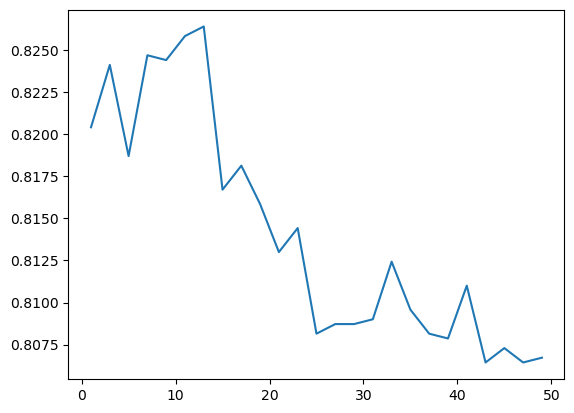

In [22]:
#Random forest classification with different values for max_depth
acc_for_depths = []
step_size = 2
for i in range(1,50,step_size):
    regressor = RandomForestClassifier(random_state = 0, max_depth = i)

    # fit the regressor with x and y data
    regressor.fit(X_train, y_train) 

    y_pred = regressor.predict(X_val)  # test the output by changing values
    #print(y_pred)

    #print("accuracy on training set: %f" % regressor.score(X_train, y_train))
    #print("accuracy on validation set: %f" % regressor.score(X_val, y_val))

    # Create confusion matrix
    #confusion = confusion_matrix(y_val, y_pred)
    #ConfusionMatrixDisplay(confusion).plot()
    # Display accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    print(accuracy)
    acc_for_depths.append(accuracy)
    
plt.plot(range(1,50,step_size), acc_for_depths)
plt.show()

### This part is not working yet.

In [17]:
# Visualising the Random Forest Regression results

# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(float(X_train)), max(float(X_train)), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: float() argument must be a string or a number, not 'DataFrame'